To do:
1. Load iris_dataset
2. Train and test split
3. 

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import graphviz 
import seaborn as sns

In [2]:
ds = datasets.load_iris(as_frame= True)
ds.keys()
df = pd.DataFrame(data= np.c_[ds['data'], ds['target']],
                     columns= ds['feature_names'] + ['target'])
df['class'] = pd.Categorical.from_codes(ds.target, ds.target_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


In [3]:

y = np.array(df['target'])
x = np.array(df.drop(columns=['target', 'class']))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
#dtc = DecisionTreeClassifier()
#pipe = Pipeline

Selected criterion is gini, selected max_depth is: 1
The depth of the decision tree is:  1
The accuracy of the model with max depth = 1 is: 0.6 

Selected criterion is gini, selected max_depth is: 2
The depth of the decision tree is:  2
The accuracy of the model with max depth = 2 is: 1.0 

Selected criterion is gini, selected max_depth is: 3
The depth of the decision tree is:  3
The accuracy of the model with max depth = 3 is: 0.9666666666666667 

Selected criterion is gini, selected max_depth is: 4
The depth of the decision tree is:  4
The accuracy of the model with max depth = 4 is: 0.9666666666666667 

Selected criterion is gini, selected max_depth is: 5
The depth of the decision tree is:  5
The accuracy of the model with max depth = 5 is: 1.0 

Selected criterion is gini, selected max_depth is: 6
The depth of the decision tree is:  5
The accuracy of the model with max depth = 5 is: 1.0 

Selected criterion is gini, selected max_depth is: 7
The depth of the decision tree is:  5
The

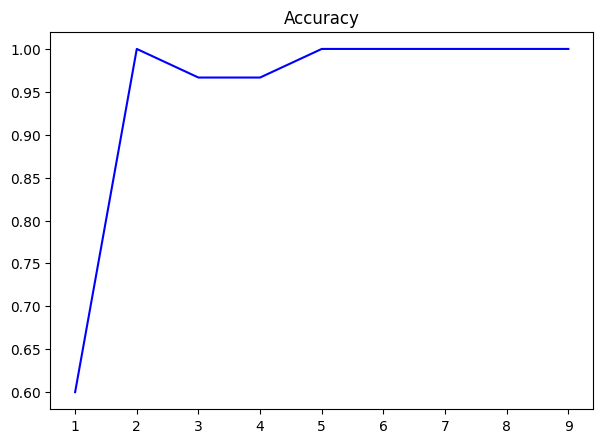

Selected criterion is entropy, selected max_depth is: 1
The depth of the decision tree is:  1
The accuracy of the model with max depth = 1 is: 0.6 

Selected criterion is entropy, selected max_depth is: 2
The depth of the decision tree is:  2
The accuracy of the model with max depth = 2 is: 1.0 

Selected criterion is entropy, selected max_depth is: 3
The depth of the decision tree is:  3
The accuracy of the model with max depth = 3 is: 0.9666666666666667 

Selected criterion is entropy, selected max_depth is: 4
The depth of the decision tree is:  4
The accuracy of the model with max depth = 4 is: 0.9666666666666667 

Selected criterion is entropy, selected max_depth is: 5
The depth of the decision tree is:  5
The accuracy of the model with max depth = 5 is: 1.0 

Selected criterion is entropy, selected max_depth is: 6
The depth of the decision tree is:  5
The accuracy of the model with max depth = 5 is: 1.0 

Selected criterion is entropy, selected max_depth is: 7
The depth of the dec

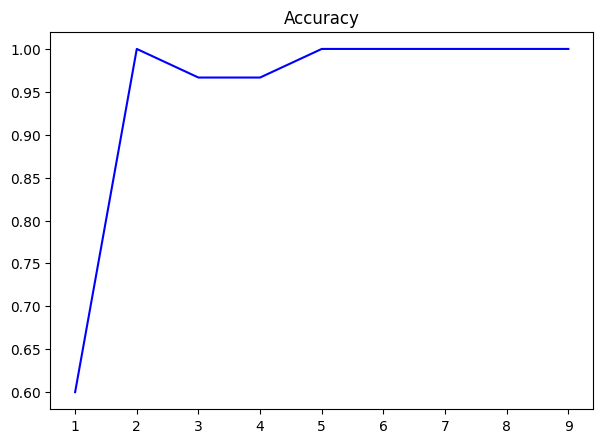

In [30]:
criterion = ['gini', 'entropy']

for i in criterion:
    accuracy= []
    for j in range(1,10):
        clf = DecisionTreeClassifier(random_state=0, criterion=i, max_depth=j)
        clf.fit(X_train, y_train)   # X_train, X_test, y_train, y_test
        y_pred = clf.predict(X_test)
        depth = clf.get_depth()
        accuracy.append(accuracy_score(y_pred, y_test))
        print(f'Selected criterion is {i}, selected max_depth is: {j}')
        print('The depth of the decision tree is: ', clf.get_depth())
        #print(confusion_matrix(y_test, y_hat))
        print(f'The accuracy of the model with max depth = {depth} is: {accuracy_score(y_pred, y_test)} \n')
    sns.lineplot(range(1, 10), accuracy,color='blue')
    plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
    plt.title('Accuracy')
    plt.show();

## we could choose depth as 2 using criterion gini, entrophy we get maximum accuracy

[Text(217.0, 314.5833333333333, 'X[2] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(108.5, 188.75, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(325.5, 188.75, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(217.0, 62.916666666666686, 'entropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(434.0, 62.916666666666686, 'entropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]')]

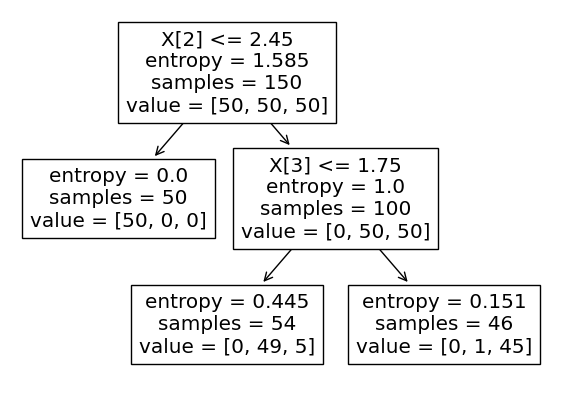

In [29]:
X, y = ds.data, ds.target
accuracy= []
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
plt.figure()
#tree.plot_tree(clf,filled=True)
clf = clf.fit(X, y)
tree.plot_tree(clf) 
    #plt.savefig('tree.eps',format='eps',bbox_inches = "tight")   # save 10 images.. 
    

In [36]:
ds['target'].shape

(150,)

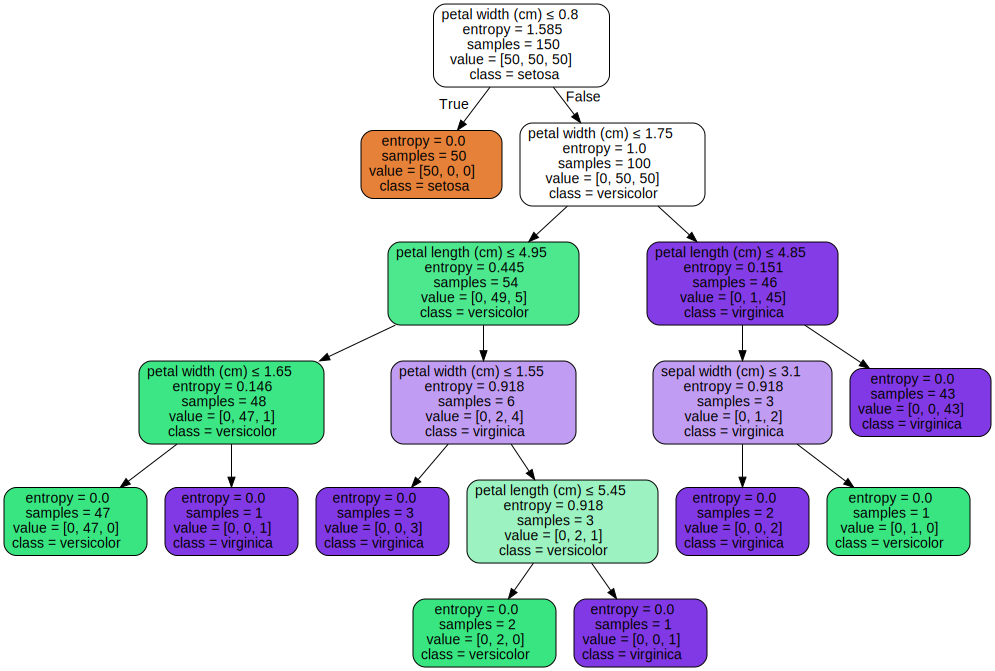

In [20]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                    feature_names = ds.feature_names,  
                    class_names = ds.target_names,  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = graphviz.Source(dot_data)  
graph
#tree.plot_tree(graph) 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=146f2f95-10e2-4546-b8bb-7deb558f2ad8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>